<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Optimizing-specific-fluxonium-property" data-toc-modified-id="Optimizing-specific-fluxonium-property-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Optimizing specific fluxonium property</a></span><ul class="toc-item"><li><span><a href="#Frequencies-and-matrix-elements-variation" data-toc-modified-id="Frequencies-and-matrix-elements-variation-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Frequencies and matrix elements variation</a></span></li><li><span><a href="#Relaxation-time-at-sweet-spot" data-toc-modified-id="Relaxation-time-at-sweet-spot-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Relaxation time at sweet spot</a></span></li><li><span><a href="#Frequency-fluctuation" data-toc-modified-id="Frequency-fluctuation-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Frequency fluctuation</a></span></li><li><span><a href="#Wavefunctions" data-toc-modified-id="Wavefunctions-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Wavefunctions</a></span></li></ul></li><li><span><a href="#Sweeping-qubit-parameters-for-T1-and-T2" data-toc-modified-id="Sweeping-qubit-parameters-for-T1-and-T2-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Sweeping qubit parameters for T1 and T2</a></span><ul class="toc-item"><li><span><a href="#Sweep-EJ-and-EL-for-T1-due-to-dielectric-loss" data-toc-modified-id="Sweep-EJ-and-EL-for-T1-due-to-dielectric-loss-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Sweep EJ and EL for T1 due to dielectric loss</a></span></li><li><span><a href="#Sweep-EJ-and-EL-for-T2-due-to-flux-noise" data-toc-modified-id="Sweep-EJ-and-EL-for-T2-due-to-flux-noise-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Sweep EJ and EL for T2 due to flux noise</a></span></li></ul></li></ul></div>

# Optimizing specific fluxonium property


In [1]:
import numpy as np
from matplotlib import pyplot as plt
from qutip import*
import sys
# sys.path.append('/Users/longnguyen/Documents/GitHub/Fluxonium_berkeley/')
sys.path.append('C:/Users/Chuanhong/OneDrive/Desktop/Projects/2023Fluxonium/Fluxonium_berkeley_repository_learning/')
from Fluxonium_hamiltonians import Single_small_junction as fluxonium
# import plotting_settings
from scipy.optimize import minimize
from scipy.special import eval_hermite as hpoly
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 400
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']

In [2]:
# %matplotlib tk
%matplotlib inline

In [1]:
# Q = 2*np.pi*5e9 * 500e-6
# print (Q*1e-6)

## Frequencies and matrix elements variation

In [3]:
N = 30 #number of levels
E_C = 1 #Charging energy, GHz
level_num = 10
phi_ext = 0.5

h = 6.626e-34 #Planck constant
kB = 1.38e-23 #Boltzmann constant

In [6]:
# #Lowest energy, 01 transition frequency
# trans_01 = energies[:, :,1] - energies[:, :,0]
# X,Y = np.meshgrid(E_L,E_J)
# Z = trans_01
# print('Z=', Z)
# plt.pcolormesh(X,Y,Z, cmap = 'RdBu_r')#, vmin = 0.2, vmax = 1.5)
# plt.ylabel(r'$E_J~(\mathrm{GHz})$')
# plt.xlabel(r'$E_L~(\mathrm{GHz})$')
# plt.colorbar()

In [7]:
# #anharmonicity
# trans_12 = energies[:, :,2] - energies[:, :,1]
# anhar = trans_12-trans_01
# X,Y = np.meshgrid(E_L,E_J)
# Z = anhar
# plt.pcolormesh(X,Y,Z, cmap = 'RdBu_r')
# plt.ylabel(r'$E_J~\mathrm{(GHz)}$')
# plt.xlabel(r'$E_L~\mathrm{(GHz)}$')
# plt.colorbar()

In [8]:
# #01 matrix element
# X,Y = np.meshgrid(E_L,E_J)
# Z = n_me[:,:,0]
# plt.pcolormesh(X,Y,Z, cmap = 'RdBu_r')
# plt.ylabel(r'$E_J~\mathrm{(GHz)}$')
# plt.xlabel(r'$E_L~\mathrm{(GHz)}$')
# plt.colorbar()

In [9]:
# #12 matrix element
# X,Y = np.meshgrid(E_L,E_J)
# Z = n_me[:,:,1]
# plt.pcolormesh(X,Y,Z, cmap = 'RdBu_r')
# plt.ylabel(r'$E_J~\mathrm{(GHz)}$')
# plt.xlabel(r'$E_L~\mathrm{(GHz)}$')
# plt.colorbar()

## Relaxation time at sweet spot

In [11]:
T_diel = 20e-3 #effective temperature in K
T_qp = 20e-3 #effective temperature in K
Q_cap = (2e-7)**-1
Q_qp = (2e-9)**-1
x_qp = 5e-9
phi = 0.5
print(T_qp)
print (1/Q_cap)
print (1/Q_qp)

0.02
2e-07
2e-09


In [12]:
E_L_array = np.linspace(0.2,1.6,21)
E_J_array = np.linspace(1,8,21)
gamma = np.zeros((len(E_J_array), len(E_L_array), 3), dtype = complex)
def gamma1(E_L, E_J):   # calculate the gamma1 based on EL, EJ values
    H = fluxonium.bare_hamiltonian(N, E_L, E_C, E_J, phi*2*np.pi) #Hamiltonian
    freq = H.eigenenergies()[1] - H.eigenenergies()[0] #transition freq
    thermal_factor_diel = (1+np.exp(-h*freq*1e9/(kB*T_diel)))
    thermal_factor_qp = (1+np.exp(-h*freq*1e9/(kB*T_qp)))
    p_me = fluxonium.phase_matrix_element(N, E_L, E_C, E_J, phi*2*np.pi, 0, 1) #Matrix element
    gamma_cap = fluxonium.relaxation_rate_cap(E_L, E_C, E_J, Q_cap,freq, p_me, T_diel)*thermal_factor_diel
    gamma_qp = fluxonium.relaxation_rate_qp_array(E_L, E_C, E_J, Q_qp, freq, p_me)*thermal_factor_qp
    # gamma_qp_01 = fluxonium.relaxation_rate_qp_01(E_L, E_C, x_qp, freq)*thermal_factor_qp
    return gamma_cap, gamma_qp, freq

for J_idx, E_J in enumerate(E_J_array):
    for L_idx, E_L in enumerate(E_L_array):
        gamma[J_idx, L_idx, :] = gamma1(E_L, E_J)

In [6]:
thermal_factor_qp1 = (1+np.exp(-h*2*1e9/(kB*20e-4)))
thermal_factor_qp2 = (1+np.exp(-h*2*1e9/(kB*20e-3)))
print(thermal_factor_qp1, thermal_factor_qp2)

1.0 1.0082178285180865


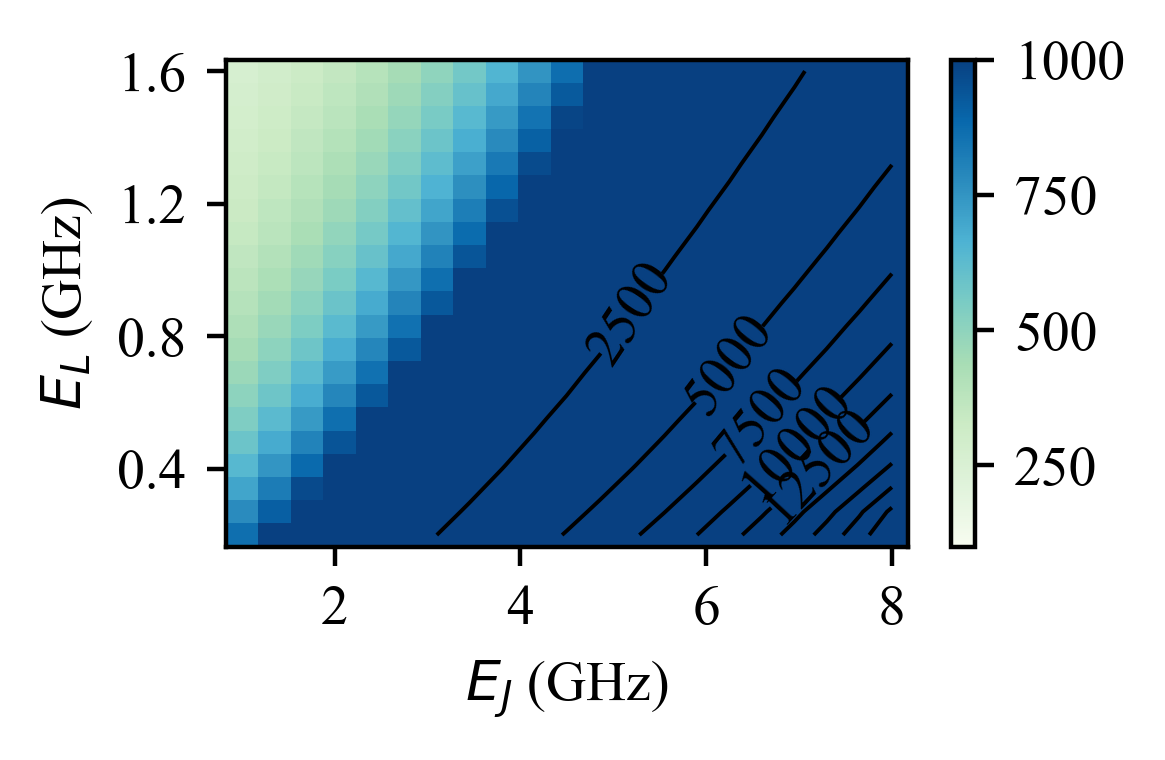

In [13]:
# gamma_cap
import matplotlib.colors as cl
plt.figure(figsize=[3,2])
plt.ylabel(r'$E_L$ (GHz)')
plt.xlabel(r'$E_J$ (GHz)')
X,Y = np.meshgrid(E_J_array, E_L_array)
Z = abs(gamma[:,:,0]).transpose()
plt.pcolormesh(X,Y,(Z**-1)*1e6, cmap = 'GnBu', vmin = 1e2, vmax = 1e3)
cbar=plt.colorbar()
contours = plt.contour(X,Y,(Z**-1)*1e6,10, colors = 'black', vmin = 1e2, vmax = 1e3,linewidths = 0.7, alpha = 1)
plt.clabel(contours, inline=True, fontsize=10, fmt='%1.0f')
plt.yticks([0.4, 0.8, 1.2, 1.6])
plt.xticks([2,4,6,8])
plt.tight_layout()

## The QP relaxation rate

$$\LARGE{
\begin{align}
    \Gamma_{01}^{\mathrm{qp}}(\omega_{01}) &= \sum_{\beta=0}^{M+1} \left| \langle 0| \sin \frac{\hat{\varphi}_\beta}{2} |1 \rangle \right|^2 \frac{8E_{J,\beta}}{\pi\hbar} x_\mathrm{qp} \sqrt{\frac{2\Delta}{\hbar\omega_{01}}} \\
    & \approx \left| \langle 0| \frac{\hat{\varphi}}{2} |1 \rangle \right|^2 \frac{8E_L}{\pi\hbar}x_\mathrm{qp}\sqrt{\frac{2\Delta}{\hbar\omega_{01}}}\\
    & =\left(\frac{E_{C}}{8E_{L}} \right)^{1/2} \frac{8E_{L}}{\pi \hbar} x_{\rm qp} \sqrt{\frac{2\Delta}{\hbar\omega_{01}}} \\
    & = (8E_{C}E_{L})^{1/2} \frac{x_{\rm qp}}{\pi \hbar}\sqrt{\frac{2\Delta}{\hbar\omega_{01}}}
    \end{align}

}$$

This is actually wrong, since the creation/destruction operators are in the basis of the harmonic oscillator, not the fluxonium basis.

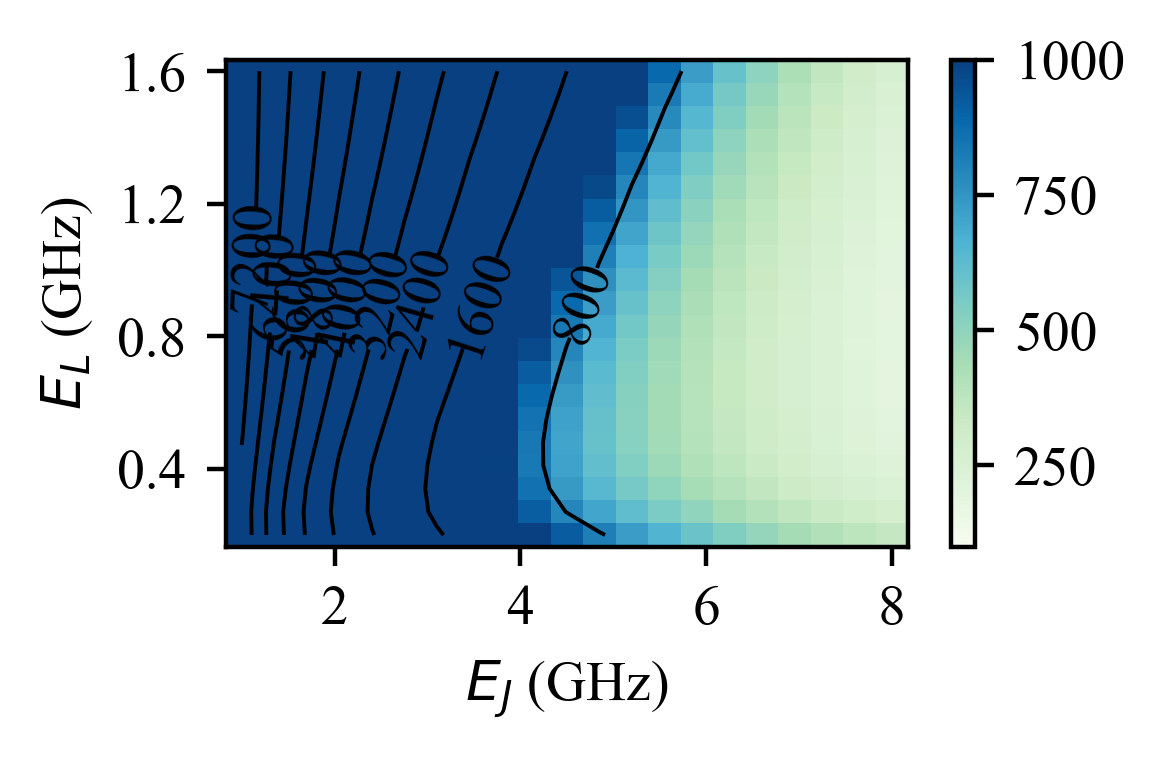

In [14]:
# gamma_qp
plt.figure(figsize=[3,2])
plt.ylabel(r'$E_L$ (GHz)')
plt.xlabel(r'$E_J$ (GHz)')
X,Y = np.meshgrid(E_J_array, E_L_array)
Z = abs(gamma[:,:,1]).transpose()
plt.pcolormesh(X,Y,(Z**-1)*1e6, cmap = 'GnBu', vmin = 1e2, vmax = 1e3)
cbar=plt.colorbar()
contours = plt.contour(X,Y,(Z**-1)*1e6,10, colors = 'black', vmin = 1e2, vmax = 1e3,linewidths = 0.7, alpha = 1)
plt.clabel(contours, inline=True, fontsize=10, fmt='%1.0f')
plt.yticks([0.4, 0.8, 1.2, 1.6])
plt.xticks([2,4,6,8])
plt.tight_layout()

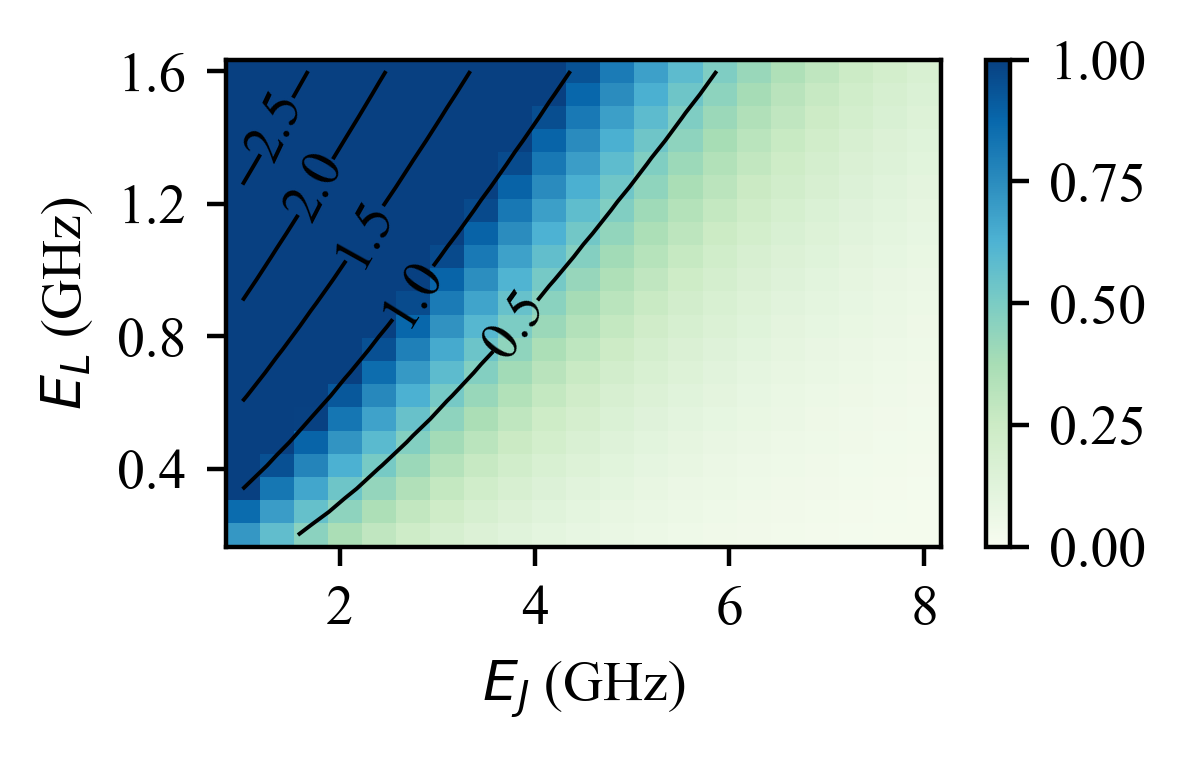

In [35]:
# gamma_qp

plt.figure(figsize=[3,2])
plt.ylabel(r'$E_L$ (GHz)')
plt.xlabel(r'$E_J$ (GHz)')
X,Y = np.meshgrid(E_J_array, E_L_array)
Z = abs(gamma[:,:,2]).transpose()
plt.pcolormesh(X,Y,Z, cmap = 'GnBu', vmin = 0.0, vmax = 1.0)
# plt.pcolormesh(X,Y,Z, cmap = 'GnBu')
cbar=plt.colorbar()
# contours = plt.contour(X,Y,Z,11, colors = 'black', vmin = 0.0, vmax = 1.0,linewidths = 0.7, alpha = 1)
contours = plt.contour(X,Y,Z,6, colors = 'black', vmin = 0.0, vmax = 1.0,linewidths = 0.7, alpha = 1)
plt.clabel(contours, inline=True, fontsize=10, fmt='%1.1f')
plt.yticks([0.4, 0.8, 1.2, 1.6])
plt.xticks([2,4,6,8])
plt.tight_layout()

T1_sweep.pdf


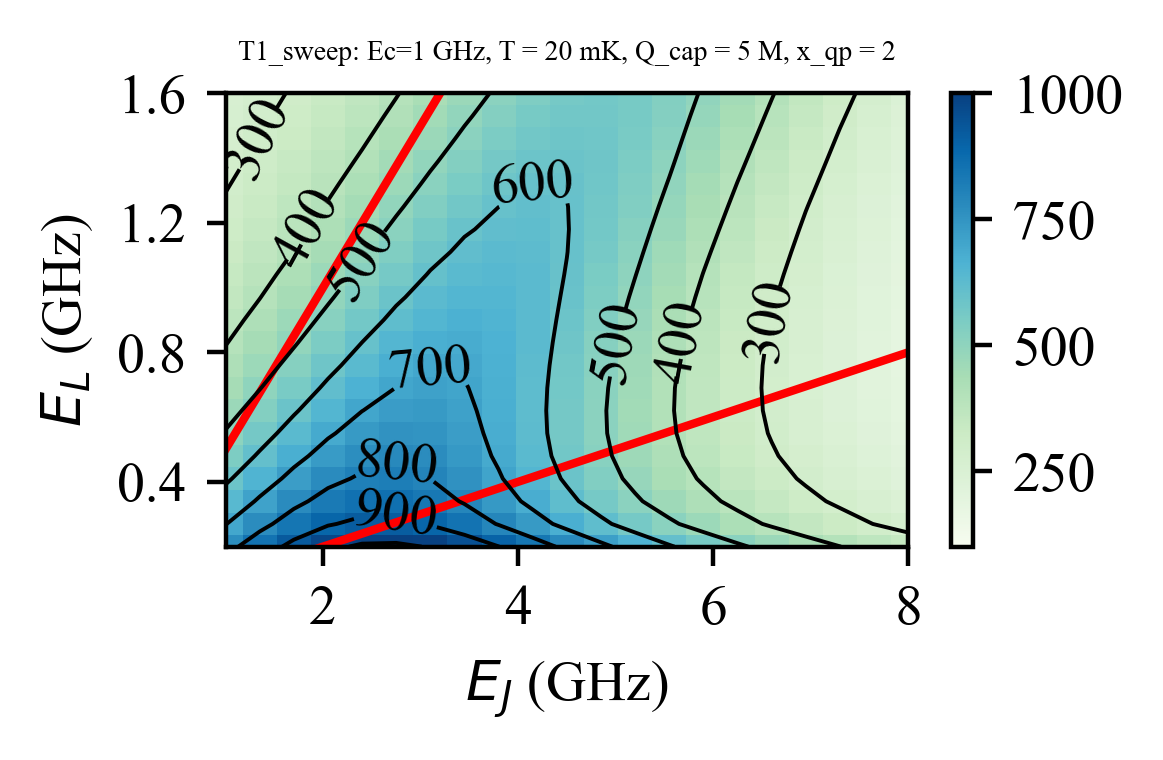

In [46]:
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']
figpath = 'C:/Users/Chuanhong/OneDrive/Desktop/Projects/2023Fluxonium/Fluxonium_berkeley_repository_learning/'
# titlename = 'T1_sweep: Ec={E_c:.0f} GHz, T = {T_eff:.0f} mK, Q_cap = {Q_cap:.0f}, X_qp = {Q_qp:.0f}'.format(E_c=E_C, T_eff=20, Q_cap=Q_cap, X_qp=Q_qp)
titlename = 'T1_sweep: Ec={E_c:.0f} GHz, T = {T_eff:.0f} mK, Q_cap = {Q_cap:.0f} M, x_qp = {X_qp:.0f}'.format(E_c=E_C, T_eff=20, Q_cap=Q_cap/1e6, X_qp = 1e9/Q_qp)
figname = 'T1_sweep.pdf'
print(figname)

plt.figure(figsize=[3,2])
plt.ylabel(r'$E_L$ (GHz)')
plt.xlabel(r'$E_J$ (GHz)')
X,Y = np.meshgrid(E_J_array, E_L_array)
Z = (abs(gamma[:,:,0])+abs(gamma[:,:,1])).transpose()

plt.plot(X[0], 0.1*X[0], 'r')
plt.plot(X[0], 0.5*X[0], 'r')
plt.xlim([1,8])
plt.ylim([0.2,1.6])
plt.pcolormesh(X,Y,(Z**-1)*1e6, cmap = 'GnBu', vmin = 1e2, vmax = 1e3)
plt.colorbar()
contours = plt.contour(X,Y,(Z**-1)*1e6, levels=np.arange(300, 1100, 100), colors = 'black', vmin = 1e2, vmax = 1e3,linewidths = 0.7, alpha = 1)
plt.clabel(contours, inline=True, fontsize=10, fmt='%1.0f')
plt.yticks([0.4, 0.8, 1.2, 1.6])
plt.xticks([2,4,6,8])
plt.title(titlename, fontsize = 5)
plt.tight_layout()

# plt.savefig(figpath+figname)

## Frequency fluctuation

In [94]:
N = 30 #number of levels
E_J = 4 #Josephson energy, GHz
E_C = 2 #Charging energy, GHz
E_L = 1 #Inductive energy, GHz
level_num = 10
phi_ext = 0.5 

H = fluxonium.bare_hamiltonian(N, E_L, E_C, E_J, np.pi)
energies = H.eigenenergies()
anchor = energies[1] - energies[0]

In [97]:
dE_L = E_L*0.1
dE_J = E_J*0.1
#new EJ
E_J_fluc = np.linspace(E_J-dE_J, E_J+dE_J, 101)
E_L_fluc = np.linspace(E_L-dE_L, E_L+dE_L, 101)
trans_freq = np.zeros((len(E_J_fluc), len(E_L_fluc)))
for idx, E_J_temp in enumerate(E_J_fluc):
    for idy, E_L_temp in enumerate(E_L_fluc):
        H = fluxonium.bare_hamiltonian(N, E_L_temp, E_C, E_J_temp, phi_ext*2*np.pi)
        energies = H.eigenenergies()
        trans_freq[idx, idy] = energies[1] - energies[0] - anchor
        

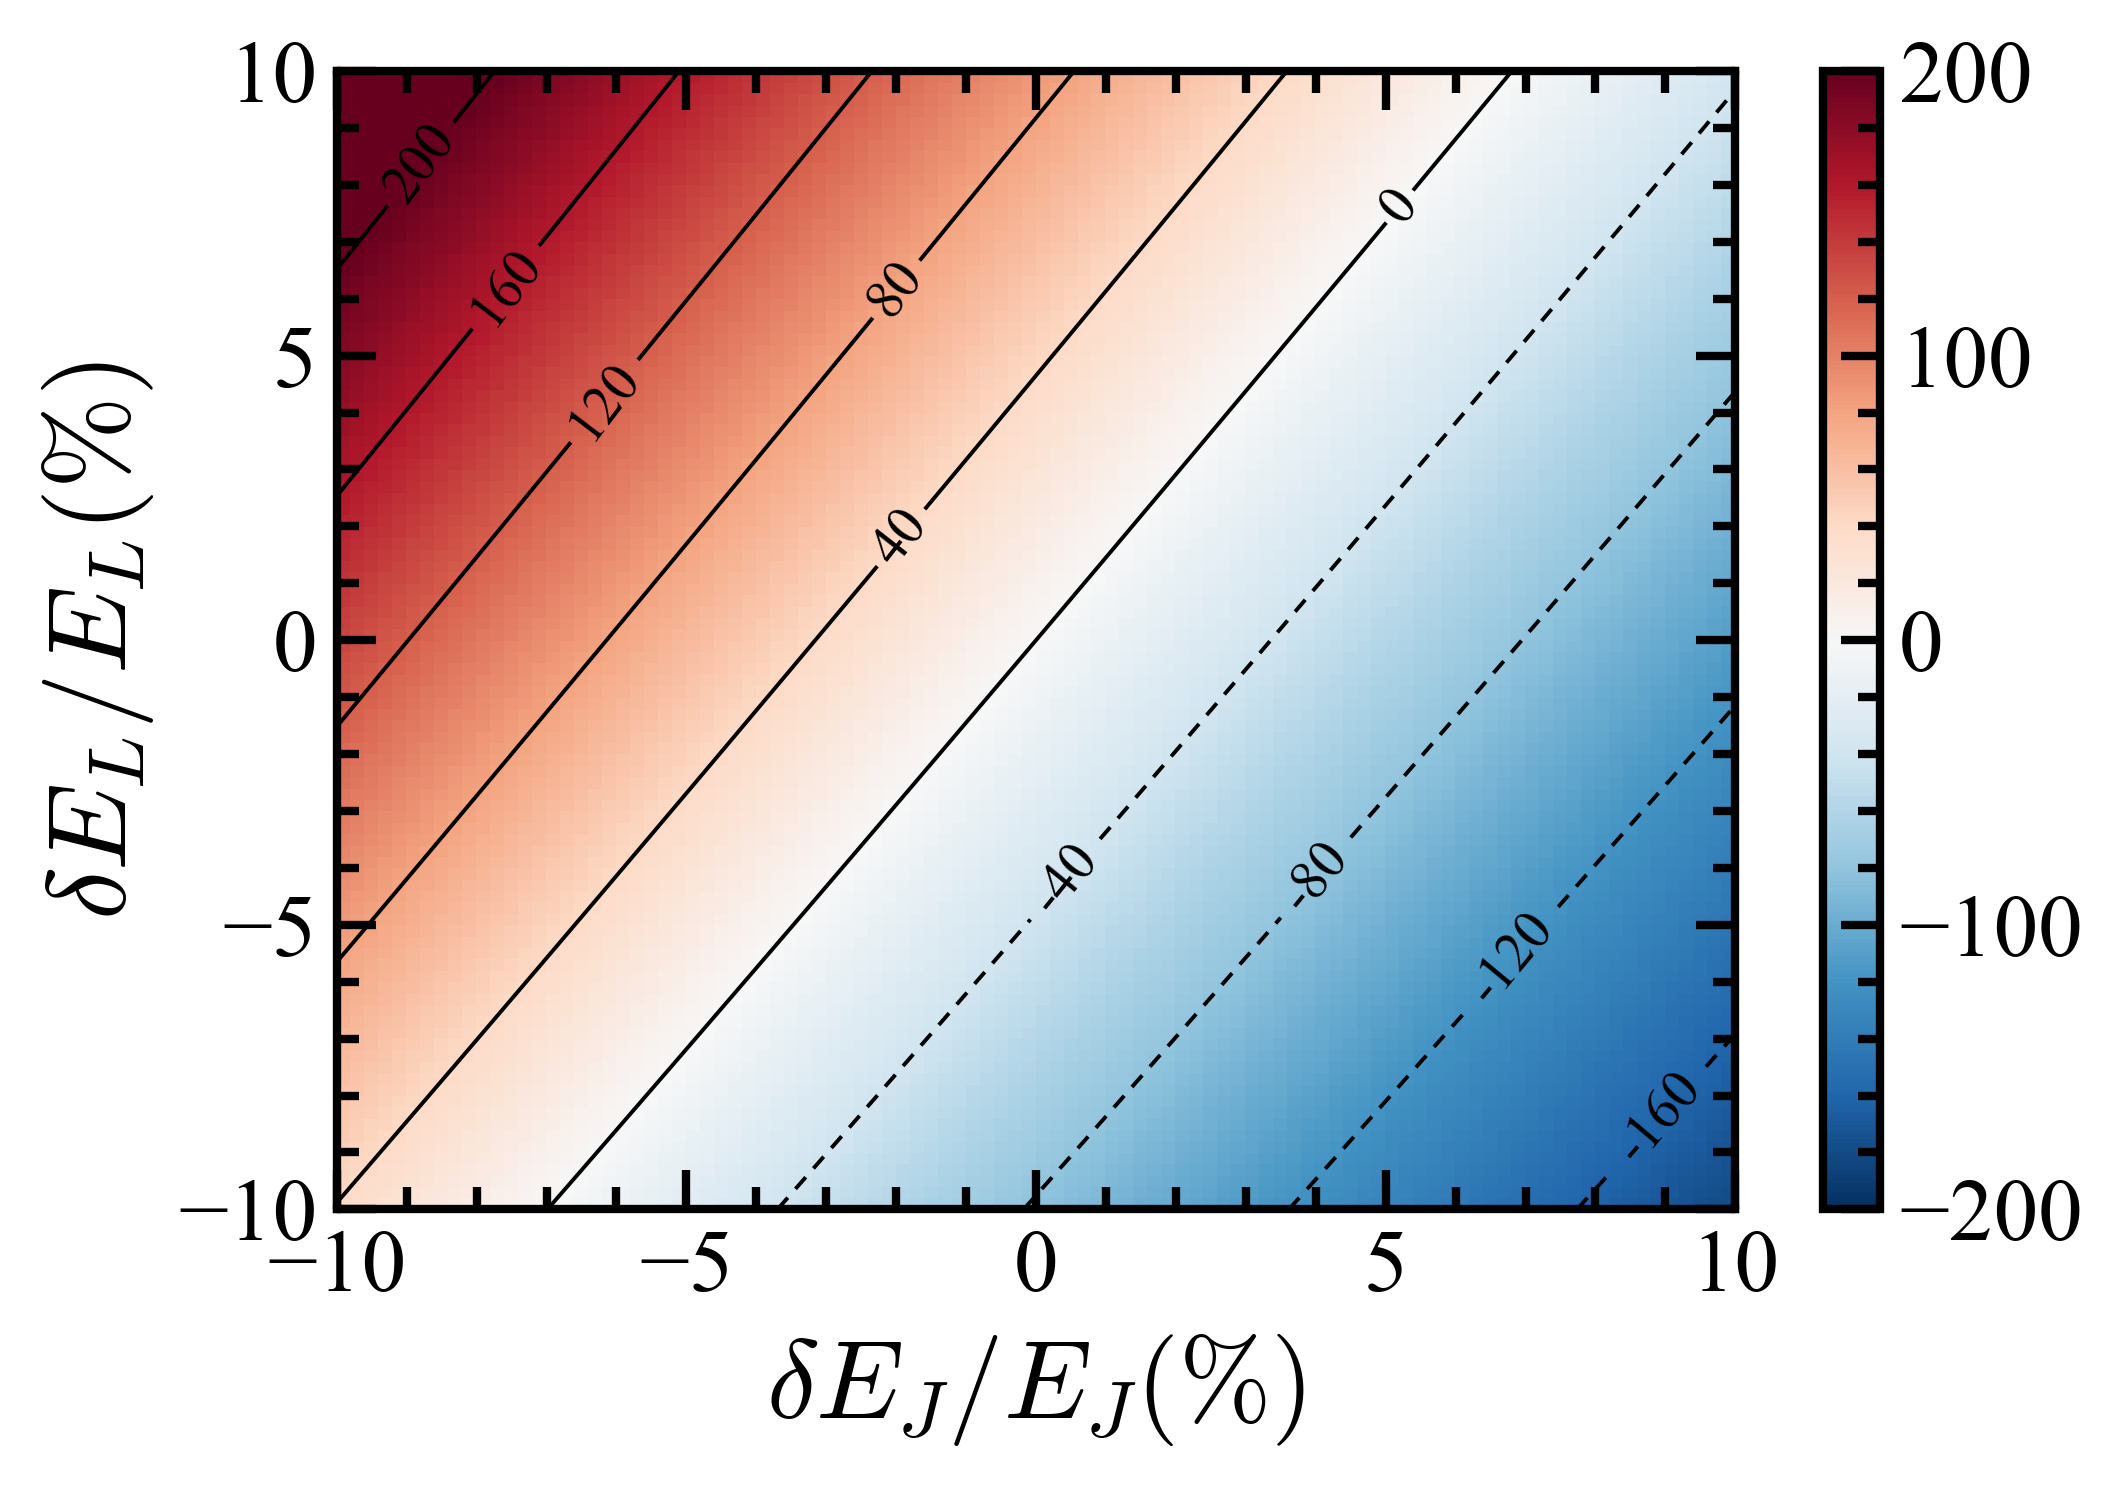

In [108]:
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times New Roman']
figpath = '/Users/longnguyen/Google Drive/LBL Research/Illustration/HCF paper/'
figname = 'fluxonium_spectrum_sweep.pdf'


plt.figure(figsize = [5.6,4])
X,Y = np.meshgrid((E_J_fluc-E_J)/E_J*100, (E_L_fluc-E_L)/E_L*100)
Z = (trans_freq*1e3).transpose()
plt.pcolor(X, Y, Z, cmap = 'RdBu_r', vmax = 200, vmin = -200)
clb = plt.colorbar()
# clb.ax.set_title(r'$\delta \omega_{01}/2\pi~(\mathrm{MHz})$')

# cbar=plt.colorbar()
# cbar.set_ticks([1e2, 1e3])
# cbar.set_ticklabels([1e2, 1e3])
contours = plt.contour(X,Y,Z,10, colors = 'black',linewidths = 0.7, alpha = 1)
plt.clabel(contours, inline=True, fontsize=10, fmt='%1.0f')


# plt.axhline(y=0, linestyle = '--', linewidth = 1.0, alpha = 0.5, color = 'C0')
# plt.axvline(x=0, linestyle = '--',linewidth = 1.0, alpha = 0.5, color = 'C1')
# plt.grid()
plt.xlabel(r'$\delta E_J/E_J (\%)$')
plt.ylabel(r'$\delta E_L/E_L (\%)$')
plt.tight_layout()
plt.savefig(figpath+figname)

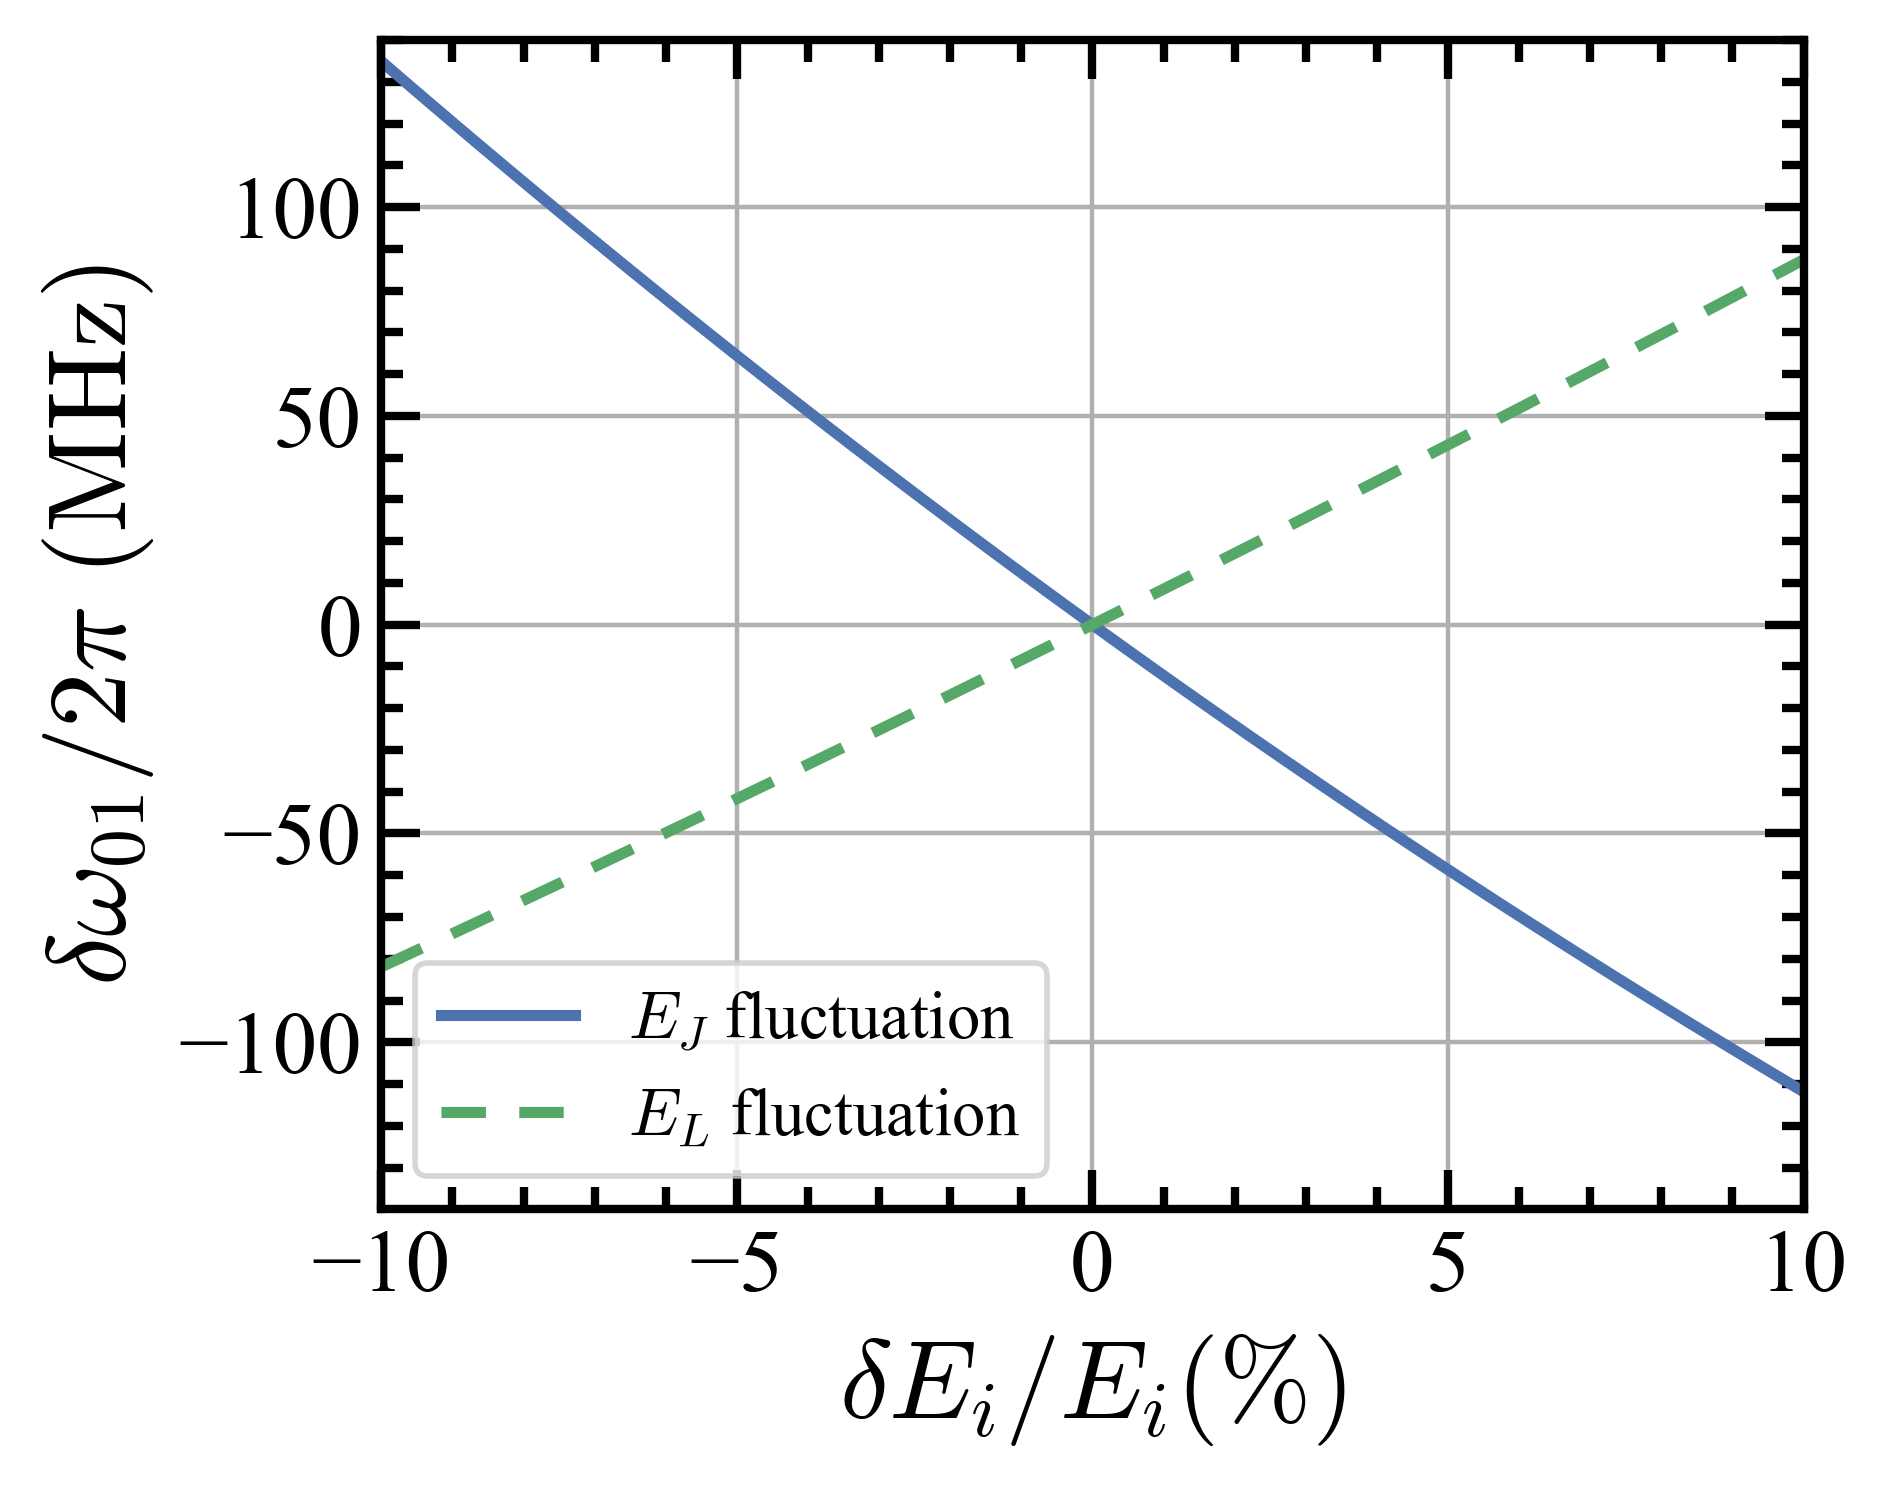

In [103]:
plt.figure(figsize = [5,4])
plt.plot((E_J_fluc-E_J)/E_J*100, trans_freq[:,50]*1e3, linestyle = '-', label = r'$E_J$ fluctuation')
plt.plot((E_J_fluc-E_J)/E_J*100, trans_freq[50,:]*1e3,linestyle = '--', label = r'$E_L$ fluctuation')
plt.xlabel(r'$\delta E_i/E_i (\%)$')
plt.ylabel(r'$\delta \omega_{01}/2\pi~(\mathrm{MHz})$')
plt.xlim([-10,10])
plt.ylim([-140,140])
plt.legend(fontsize =12)
plt.grid()
plt.tight_layout()
figname = 'fluxonium_freq_dispersion1.pdf'
plt.savefig(figpath+figname)

In [51]:
N = 30 #number of levels
E_J = 3.5 #Josephson energy, GHz
E_C = 1 #Charging energy, GHz
E_L = 0.7 #Inductive energy, GHz
level_num = 10
phi_ext = 0.5 

dE_L = E_L*0.1
dE_J = E_J*0.1
#new EJ
E_J_fluc = np.linspace(E_J-dE_J, E_J+dE_J, 101)
E_L_fluc = np.linspace(E_L-dE_L, E_L+dE_L, 101)
trans_freq_EL = np.zeros((len(E_L_fluc), 3))
trans_freq_EJ = np.zeros((len(E_J_fluc), 3))

for idx, E_L_temp in enumerate(E_L_fluc):
    H = fluxonium.bare_hamiltonian(N, E_L_temp, E_C, E_J, phi_ext*2*np.pi)
    energies = H.eigenenergies()
    trans_freq_EL[idx, 0] = energies[3] - energies[0] 
    trans_freq_EL[idx, 1] = energies[4] - energies[1]
    trans_freq_EL[idx, 2] = energies[1] - energies[0]




for idx, E_J_temp in enumerate(E_J_fluc):
    H = fluxonium.bare_hamiltonian(N, E_L, E_C, E_J_temp, phi_ext*2*np.pi)
    energies = H.eigenenergies()
    trans_freq_EJ[idx, 0] = energies[3] - energies[0] 
    trans_freq_EJ[idx, 1] = energies[4] - energies[1]
    trans_freq_EJ[idx, 2] = energies[1] - energies[0]
    

(4.0, 10.0)

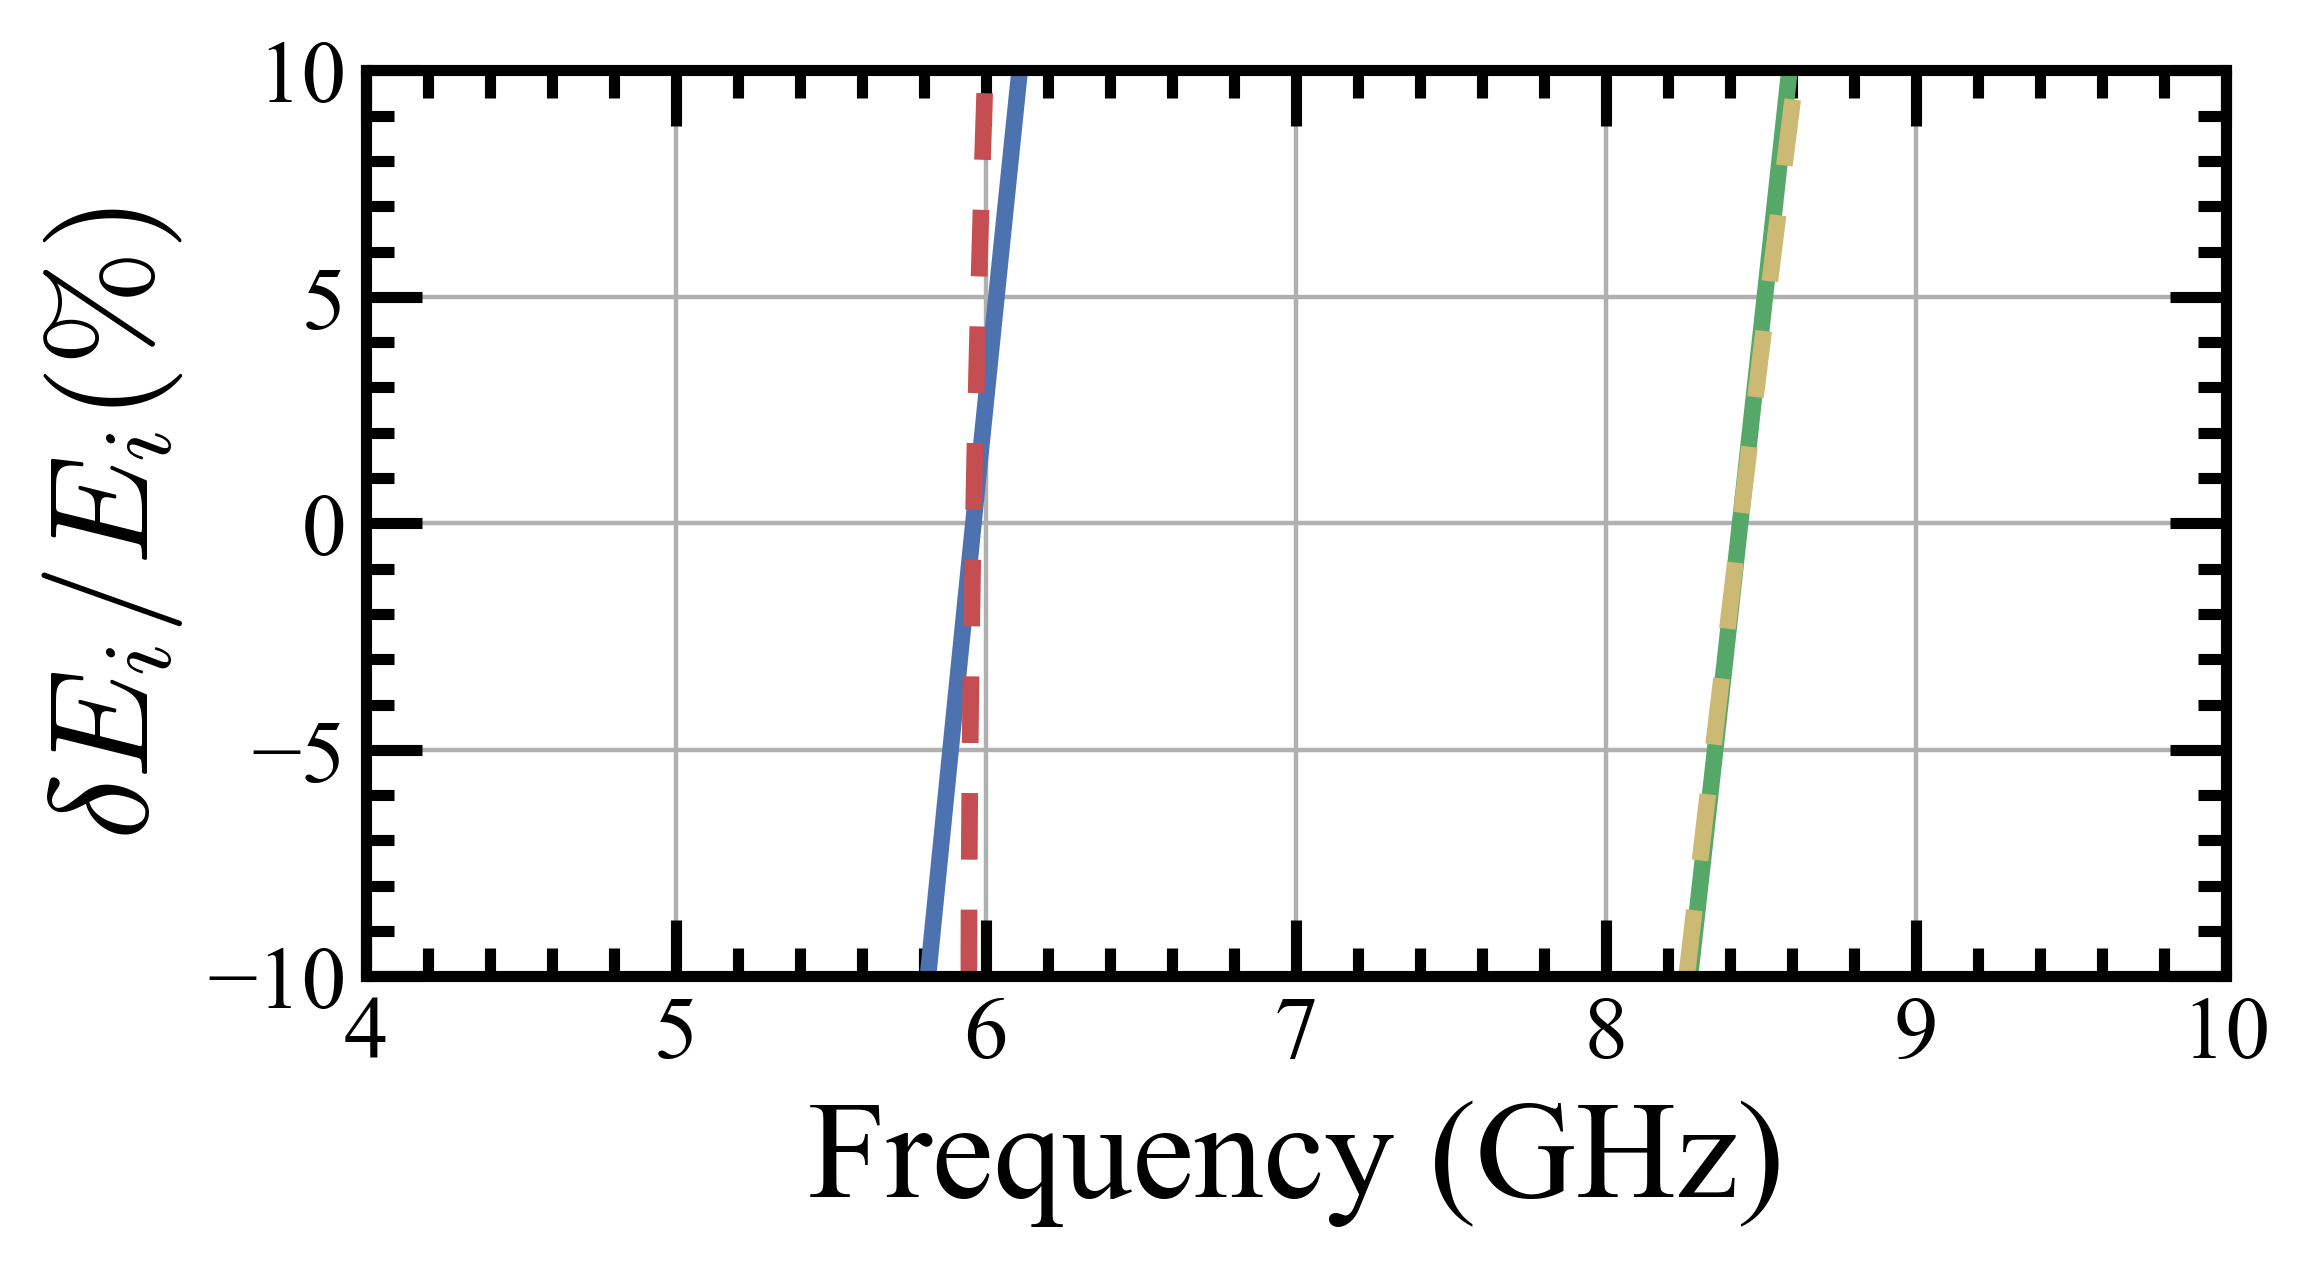

In [57]:
plt.figure(figsize=[6,3])
plt.plot(trans_freq_EL[:, 0], (E_L_fluc-E_L)/E_L*100)
plt.plot(trans_freq_EL[:, 1], (E_L_fluc-E_L)/E_L*100)

plt.plot(trans_freq_EJ[:, 0], (E_J_fluc-E_J)/E_J*100, '--')
plt.plot(trans_freq_EJ[:, 1], (E_J_fluc-E_J)/E_J*100,'--',color='C4')

plt.ylabel(r'$\delta E_i/E_i (\%)$')
plt.xlabel("Frequency (GHz)")
# plt.plot(E_L_fluc, trans_freq_EL[:, 2])
plt.grid()
plt.ylim([(E_L_fluc[0]-E_L)/E_L*100,(E_L_fluc[-1]-E_L)/E_L*100])
plt.xlim([4,10])


## Wavefunctions

In [12]:
N = 30 #number of levels
E_J = 3 #Josephson energy, GHz
E_C = 3 #Charging energy, GHz
E_L = 0.5 #Inductive energy, GHz
level_num = 10
phi_ext = np.linspace(0,1,101)
energies = np.zeros((len(phi_ext), level_num))
states = np.zeros((len(phi_ext), level_num, N))
max_display_y = 10

In [13]:
for idx, phi in enumerate(phi_ext):
    H = fluxonium.bare_hamiltonian(N, E_L, E_C, E_J, phi*2*np.pi)
    energies[idx, :] = H.eigenenergies()[:level_num]

In [14]:
def ho_wf(phi,l,Ec,El):
    ratio = (8.0*Ec/El)**(0.25)
    coeff = (2.0**l*np.math.factorial(l)*np.sqrt(np.pi)*ratio)**(-0.5)
    return coeff * np.exp(-0.5*(phi/ratio)**2) * hpoly(l,phi/ratio)

toPlotNum = 5
# phi_ext=[0.5]
phi = np.linspace(-3*np.pi,3*np.pi,101)
waveFunc = np.zeros((len(phi), len(phi_ext), toPlotNum))
potential = np.zeros((len(phi), len(phi_ext)))
for phi_idx, phi_e in enumerate(phi_ext):
    H = fluxonium.bare_hamiltonian(N,E_L,E_C,E_J, phi_e*2*np.pi)
    evalues, evectors = H.eigenstates()
    for state_idx in range(toPlotNum):
        wFunc = np.zeros(len(phi))
        for lvl_idx in range(N):
            coeff = np.real(evectors[state_idx].full()[lvl_idx, 0])
            wFunc = wFunc + coeff*ho_wf(phi, lvl_idx, E_C, E_L)
        waveFunc[:, phi_idx, state_idx] = wFunc + evalues[state_idx]
    potential[:,phi_idx] = 0.5*E_L*phi**2 - E_J*np.cos(phi-phi_e*2*np.pi) 

OSError: [Errno 63] File name too long: '/Users/longnguyen/Documents/wFunction1_[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13\n 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27\n 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41\n 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55\n 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69\n 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83\n 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97\n 0.98 0.99 1.  ].png'

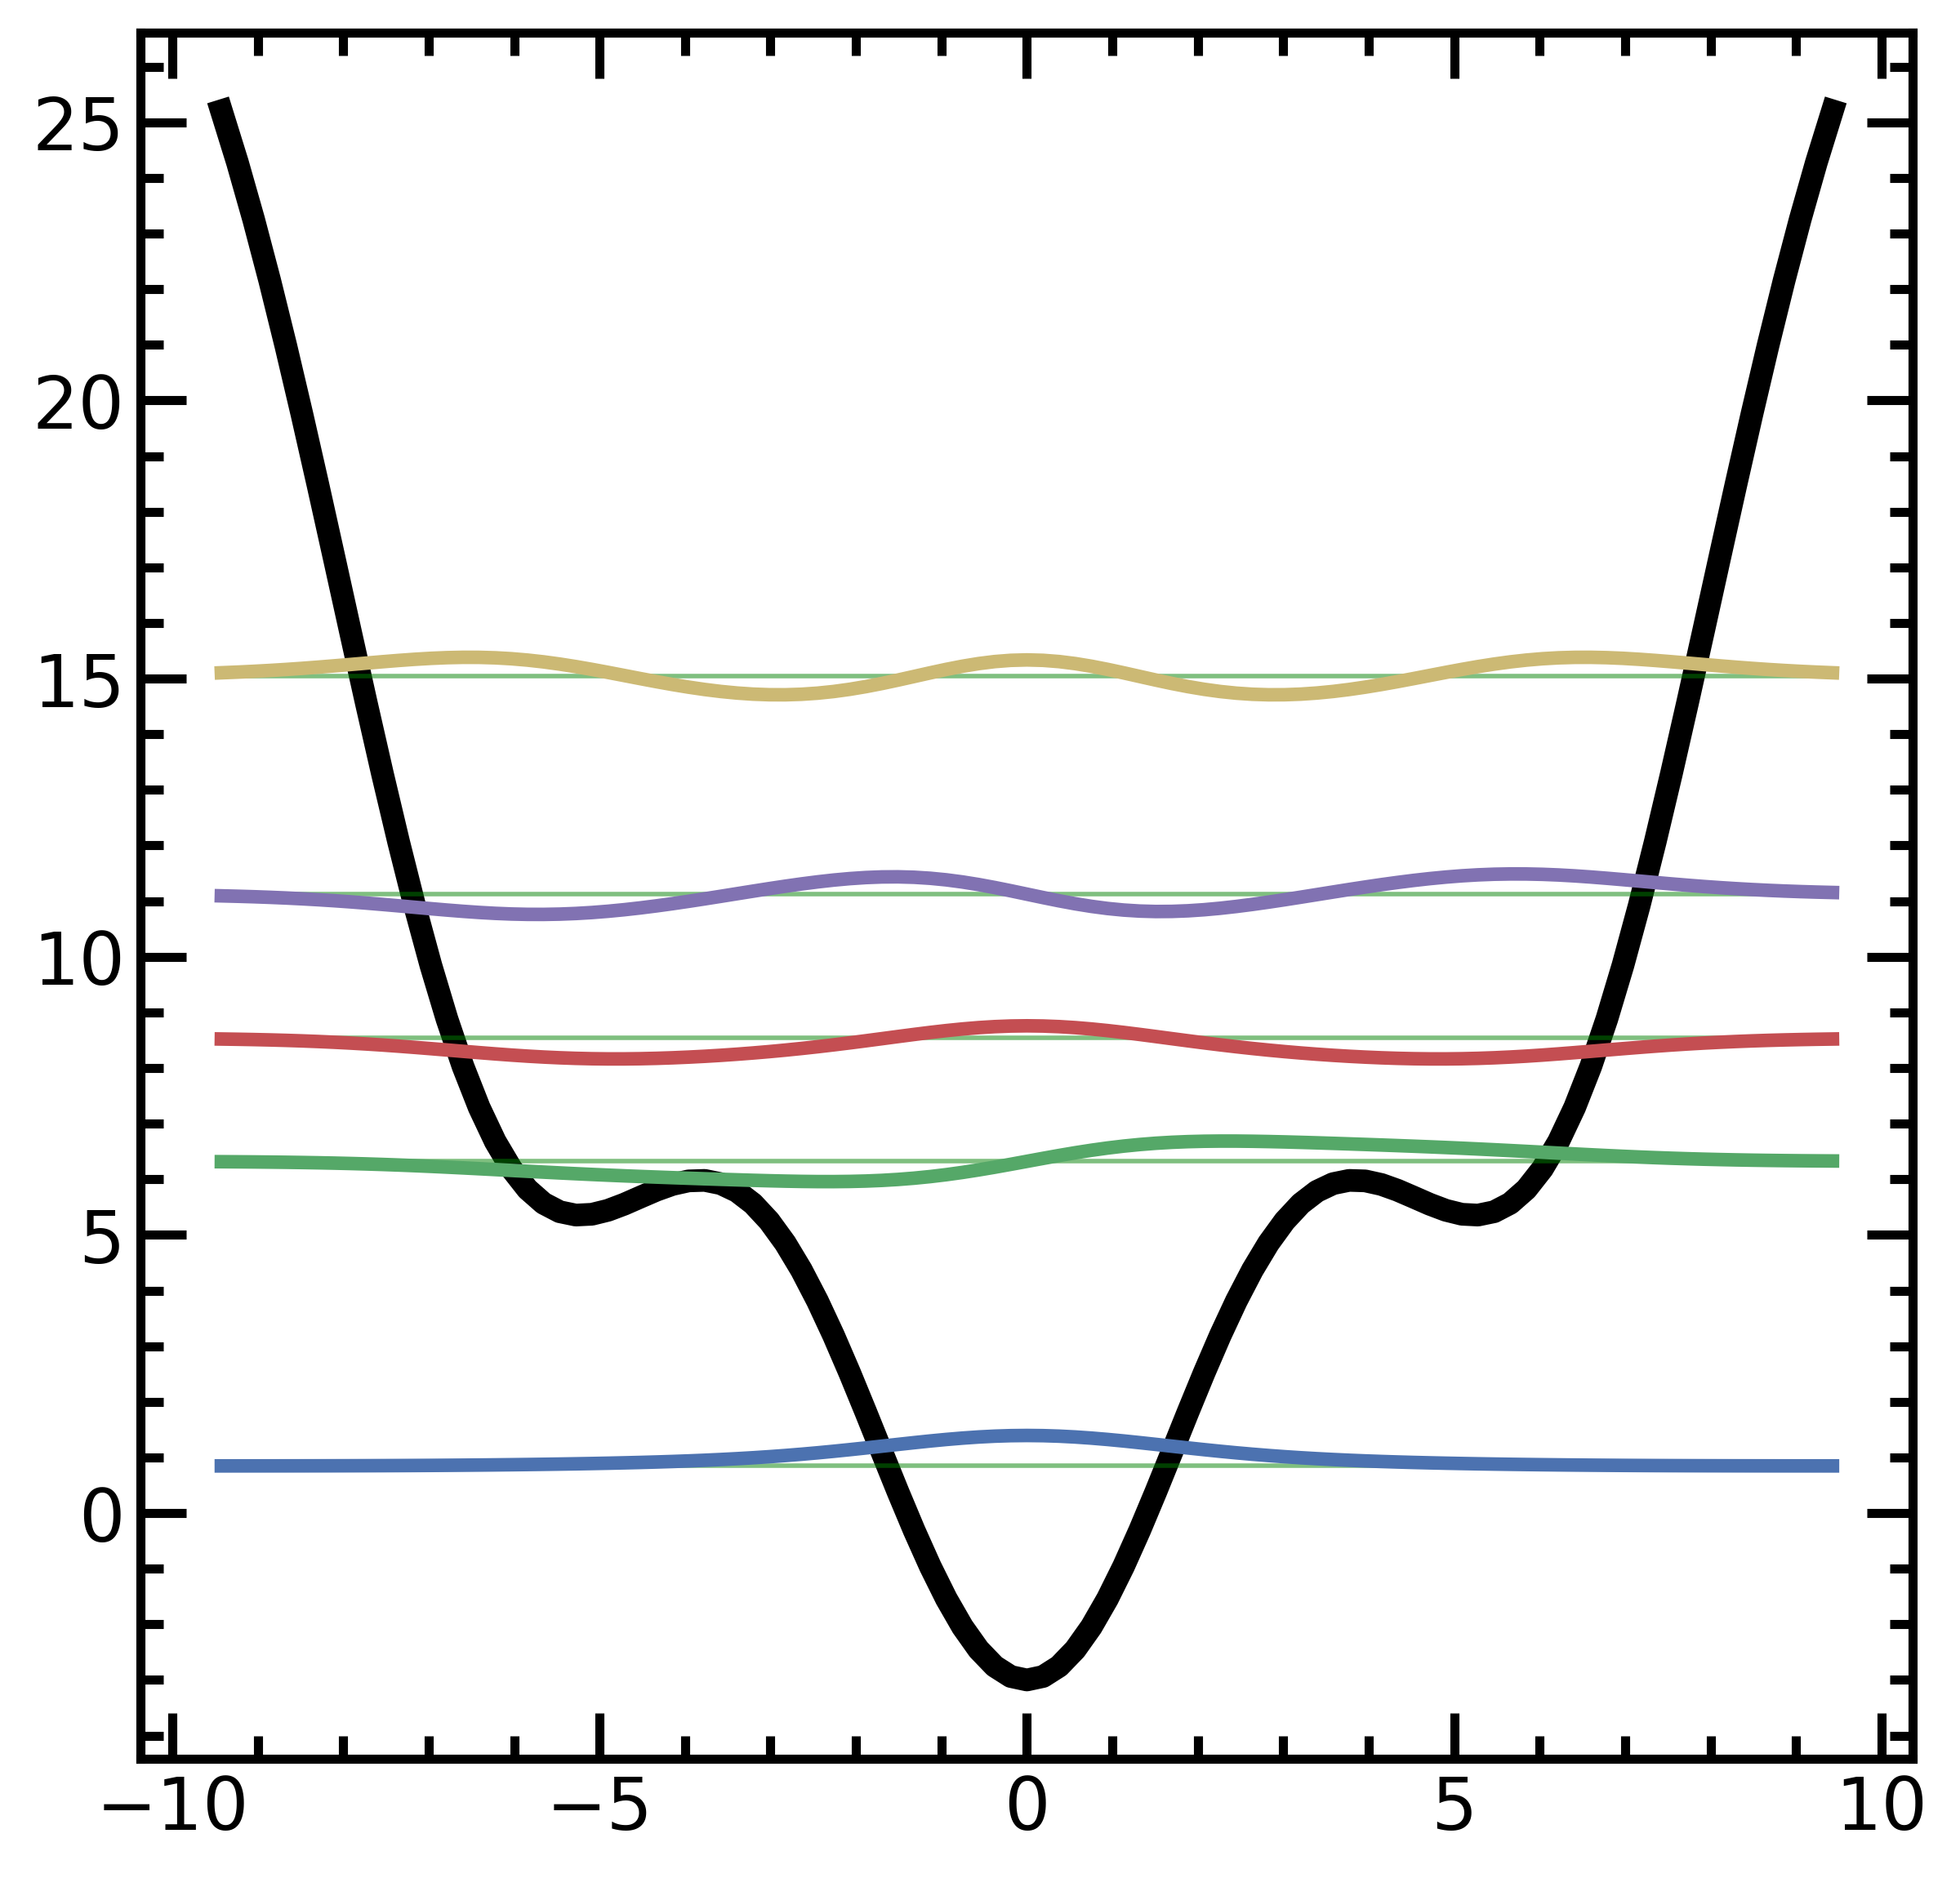

In [15]:
plt.figure(figsize = [7,7])  
path = "/Users/longnguyen/Documents/wFunction1_"
for phi_idx in range(len(phi_ext)):
    fname = path +str(phi_ext)+'.png'
    plt.plot(phi,potential[:, phi_idx], linewidth = 5, color = 'k')
    for state_idx in range(toPlotNum):
        plt.plot(phi,np.ones(len(phi))*energies[phi_idx,state_idx], linewidth = 1, alpha = 0.5, color = 'g')
        plt.plot(phi,waveFunc[:, phi_idx, state_idx])
    plt.savefig(fname)

# Sweeping qubit parameters for T1 and T2 

## Sweep EJ and EL for T1 due to dielectric loss

In [5]:
E_J_array = np.linspace(5,7,5)
E_L_array = np.linspace(0.2,0.8,5)
# print(E_L_array)
N = 30 #number of levels
E_J = 6 #Josephson energy, GHz
E_C = 1 #Charging energy, GHz
E_L = 0.5 #Inductive energy, GHz
level_num = 10
phi_ext = np.linspace(0,0.5,101)

#Sweep EJ
for idx, phi in enumerate(phi_ext):
    H = fluxonium.bare_hamiltonian(N, E_L, E_C, E_J, phi*2*np.pi)
    energy = H.eigenenergies()[:level_num]

## Sweep EJ and EL for T2 due to flux noise

In [ ]:
E_J_array = np.linspace(5,7,5)
E_L_array = np.linspace(0.2,0.8,5)
# print(E_L_array)
N = 30 #number of levels
E_J = 6 #Josephson energy, GHz
E_C = 1 #Charging energy, GHz
E_L = 0.5 #Inductive energy, GHz
level_num = 10
phi_ext = np.linspace(0,0.5,101)

